In [1]:
# 製作近40天的日期
from datetime import timedelta
from datetime import datetime

ago_list=[]
how_days=40

today=datetime.now()
print('今天-1日期:',today)
ago_30=today-timedelta(days=how_days)
print('40天前日期:',ago_30)

# 印出時間字串 range可以控制日期範圍
for t in range(0,int(how_days)-1):    
    ago_days=ago_30+timedelta(t)  # 從30天前一天一天累加至今天
    ago_days=datetime.strftime(ago_days,'%Y-%m-%d')   # 將時間格式轉成字串
    ago_list.append(ago_days)
print(ago_list)

今天-1日期: 2022-04-27 02:38:31.667278
40天前日期: 2022-03-18 02:38:31.667278
['2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24', '2022-04-25']


In [2]:
# 爬取北中南東台灣分類縣市 轉換成需要的樣子 練習簡單處理字串
import bs4,requests

url='https://www.ndc.gov.tw/nc_77_4402'
headers={'user-agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'}
response=requests.get(url,headers=headers)
obj_soup=bs4.BeautifulSoup(response.text,'lxml')

c_list_1,c_list_2,citys_list,citys_dict=[],[],[],[]
change_list=['、','及','與']  # 印出網頁內容後得知的內容 把這些字串轉成可以分隔用的符號*
remove_list=['\r\n\t','。','包括']  # 把不要的字串變空值

get_citys=obj_soup.find('div','introduce').find_all('li')[-1]
for city in get_citys:
    # 如果內容是bs4.element.NavigableString型態的話 表示不是標籤
    if type(city)==bs4.element.NavigableString:
        for r in remove_list:
            city=city.replace(r,'')
        for c in change_list:
            city=city.replace(c,'*')
        city=city.replace('臺','台')
        city=city.replace('部區域','台灣')
        c_list_1.append(city)
    else:
        print()
        #print(type(city),'是標籤所以不取')
#print(c_list_1)

for citys in c_list_1:
    this_areas=citys.split('：')[0]
    this_citys=citys.split('：')[1]
    #print(this_citys)
    c_list_2.append(this_citys)
    for t in c_list_2:
        this_city=t.split('*')  
    citys_dict.append([this_areas,this_city])
    #citys_list.append(this_city)  # 給找df的縣市備用
    
citys_dict=dict(citys_dict)  
#print(citys_list)  # 只有縣市
print(citys_dict)  # 有北中南東台灣鍵的縣市





{'北台灣': ['台北市', '新北市', '基隆市', '新竹市', '桃園市', '新竹縣', '宜蘭縣'], '中台灣': ['台中市', '苗栗縣', '彰化縣', '南投縣', '雲林縣'], '南台灣': ['高雄市', '台南市', '嘉義市', '嘉義縣', '屏東縣', '澎湖縣'], '東台灣': ['花蓮縣', '台東縣'], '福建省': ['金門縣', '連江縣']}


In [3]:
# 解決python爬蟲requests.exceptions.SSLError: HTTPSConnectionPool(host='XXX', port=443)問題
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

# 爬取六都縣市 轉換成需要的樣子 練習簡單處理字串

sixs_url='https://www.president.gov.tw/Page/106'
sixs_headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'}
sixs_response=requests.get(sixs_url,headers=sixs_headers,verify=False)  # verify=False取消控制台輸出
sixs_soup=bs4.BeautifulSoup(sixs_response.text,'lxml')

sixs_citys_list=[]

get_sixs_citys=sixs_soup.find_all('div','big2 counties center')[0]
# print(get_sixs_citys.text.strip())
for get_six in get_sixs_citys:
    # 如果抓下來的文字在a標籤內 就使用type判斷bs4.element.Tag
    if type(get_six)==bs4.element.Tag:
        txts=get_six.text.strip()
        txts=txts.replace('臺','台')
        sixs_citys_list.append(txts)
#print(sixs_citys_list)        
sixs_citys_dict={'六都':sixs_citys_list}
#print(sixs_citys_dict)
citys_dict_new=citys_dict.copy()
citys_dict_new.update(sixs_citys_dict)   # 合併字典
print(citys_dict_new)

{'北台灣': ['台北市', '新北市', '基隆市', '新竹市', '桃園市', '新竹縣', '宜蘭縣'], '中台灣': ['台中市', '苗栗縣', '彰化縣', '南投縣', '雲林縣'], '南台灣': ['高雄市', '台南市', '嘉義市', '嘉義縣', '屏東縣', '澎湖縣'], '東台灣': ['花蓮縣', '台東縣'], '福建省': ['金門縣', '連江縣'], '六都': ['台北市', '新北市', '桃園市', '台中市', '台南市', '高雄市']}


In [4]:
import pandas as pd
# 抓今天日期
today = datetime.now()
today_name = datetime.strftime(today, '%Y-%m-%d')
print(today_name)

fn='Csvs/Taiwan_COVID_19_'+today_name+'.csv'
df=pd.read_csv(fn)
print(df) 
   
# 找出每行的列是否有空值
print(pd.isnull(df).sum(axis=1))  # 按行方向印出內容是否空值 因此axis=1
df.dropna(axis=0,how='any')     # 刪除列 因此axis=0

2022-04-27
           id       個案研判日       個案公佈日    縣市   鄉鎮 性別 是否為境外移入    年齡層
0       6,789  2022-04-25  2022-04-25   高雄市  鼓山區  女       否  20-24
1       6,790  2022-04-25  2022-04-25   高雄市  鼓山區  女       否  20-24
2       6,791  2022-04-25  2022-04-25   高雄市  鼓山區  女       否  25-29
3       6,792  2022-04-25  2022-04-25   高雄市  鼓山區  女       否  25-29
4       6,793  2022-04-25  2022-04-25   高雄市  鼓山區  女       否  30-34
...       ...         ...         ...   ...  ... ..     ...    ...
68011  68,012  2020-01-27  2020-01-27  境外移入   空值  女       是  50-54
68012  68,013  2020-01-26  2020-01-26  境外移入   空值  女       是  55-59
68013  68,014  2020-01-24  2020-01-24  境外移入   空值  女       是  50-54
68014  68,015  2020-01-24  2020-01-24  境外移入   空值  男       是  55-59
68015  68,016  2020-01-22  2020-01-22  境外移入   空值  女       是  55-59

[68016 rows x 8 columns]
0        0
1        0
2        0
3        0
4        0
        ..
68011    0
68012    0
68013    0
68014    0
68015    0
Length: 68016, dtype: int64


,id,個案研判日,個案公佈日,縣市,鄉鎮,性別,是否為境外移入,年齡層
0,"6,789",2022-04-25,2022-04-25,高雄市,鼓山區,女,否,20-24
1,"6,790",2022-04-25,2022-04-25,高雄市,鼓山區,女,否,20-24
2,"6,791",2022-04-25,2022-04-25,高雄市,鼓山區,女,否,25-29
3,"6,792",2022-04-25,2022-04-25,高雄市,鼓山區,女,否,25-29
4,"6,793",2022-04-25,2022-04-25,高雄市,鼓山區,女,否,30-34
...,...,...,...,...,...,...,...,...
68011,"68,012",2020-01-27,2020-01-27,境外移入,空值,女,是,50-54
68012,"68,013",2020-01-26,2020-01-26,境外移入,空值,女,是,55-59
68013,"68,014",2020-01-24,2020-01-24,境外移入,空值,女,是,50-54
68014,"68,015",2020-01-24,2020-01-24,境外移入,空值,男,是,55-59


0 : 2022-03-18
1
0
0
0
0
0
0
1 : 2022-03-19
0
0
0
0
3
0
0
2 : 2022-03-20
1
3
0
0
0
0
0
3 : 2022-03-21
1
0
0
0
0
0
0
4 : 2022-03-22
3
0
0
0
0
0
0
5 : 2022-03-23
1
1
0
0
0
0
0
6 : 2022-03-24
0
1
0
0
0
0
0
7 : 2022-03-25
0
11
4
0
0
0
0
8 : 2022-03-26
0
14
15
0
1
0
0
9 : 2022-03-27
1
8
7
2
2
54
0
10 : 2022-03-28
5
10
15
0
4
4
0
11 : 2022-03-29
1
10
8
1
5
0
0
12 : 2022-03-30
7
16
33
2
14
2
0
13 : 2022-03-31
10
35
18
0
23
1
3
14 : 2022-04-01
19
51
35
1
22
2
5
15 : 2022-04-02
13
82
41
2
25
8
8
16 : 2022-04-03
22
43
33
2
16
11
5
17 : 2022-04-04
29
91
31
7
13
11
3
18 : 2022-04-05
41
95
28
8
10
14
5
19 : 2022-04-06
84
114
38
4
35
8
2
20 : 2022-04-07
61
156
32
5
30
10
5
21 : 2022-04-08
74
138
40
3
40
7
6
22 : 2022-04-09
67
125
28
6
42
14
15
23 : 2022-04-10
96
173
35
10
35
13
12
24 : 2022-04-11
101
154
38
6
30
16
9
25 : 2022-04-12
142
254
57
15
74
23
11
26 : 2022-04-13
147
359
59
10
94
22
13
27 : 2022-04-14
145
345
45
14
153
14
35
28 : 2022-04-15
185
409
93
14
264
16
39
29 : 2022-04-16
223
420
102

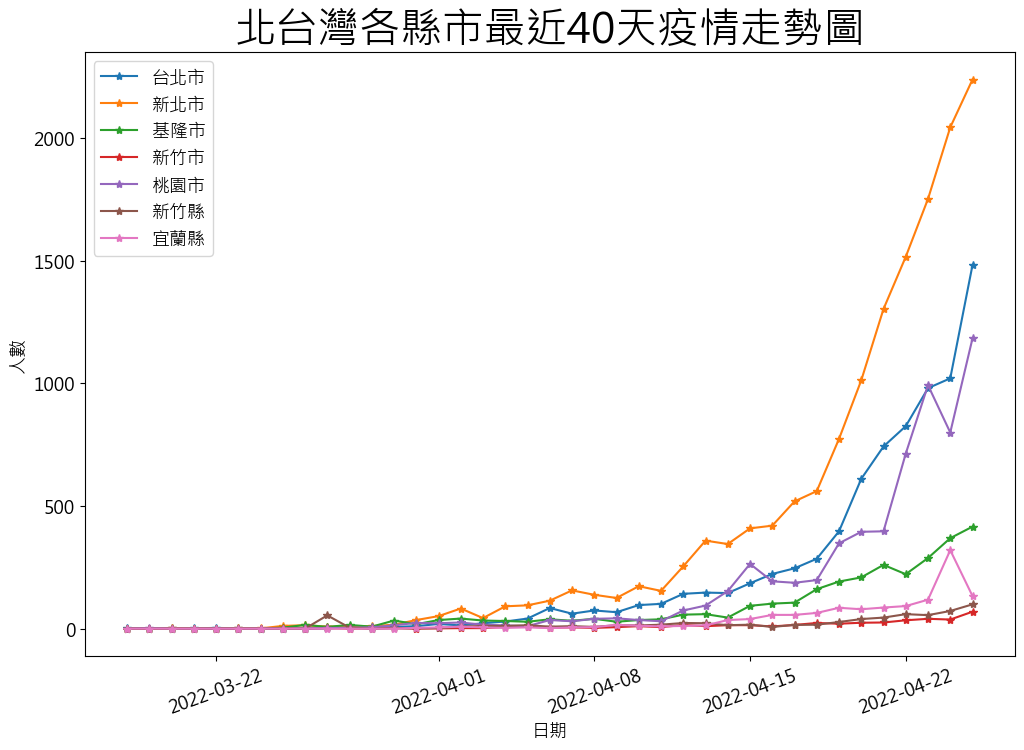

0 : 2022-03-18
0
0
0
0
0
1 : 2022-03-19
0
0
0
0
0
2 : 2022-03-20
0
0
0
0
0
3 : 2022-03-21
0
0
0
0
4
4 : 2022-03-22
0
0
0
0
0
5 : 2022-03-23
0
0
0
0
2
6 : 2022-03-24
0
0
0
0
0
7 : 2022-03-25
0
0
0
0
0
8 : 2022-03-26
0
0
0
0
0
9 : 2022-03-27
0
0
0
0
0
10 : 2022-03-28
0
0
2
0
0
11 : 2022-03-29
0
0
0
0
0
12 : 2022-03-30
0
0
0
0
0
13 : 2022-03-31
2
0
4
0
0
14 : 2022-04-01
2
0
3
0
0
15 : 2022-04-02
3
0
0
0
0
16 : 2022-04-03
1
0
0
0
0
17 : 2022-04-04
4
0
2
0
0
18 : 2022-04-05
2
1
3
0
0
19 : 2022-04-06
4
0
1
0
3
20 : 2022-04-07
4
3
1
0
3
21 : 2022-04-08
7
3
3
0
1
22 : 2022-04-09
7
0
0
2
2
23 : 2022-04-10
9
4
3
0
6
24 : 2022-04-11
21
2
3
1
2
25 : 2022-04-12
26
3
7
1
1
26 : 2022-04-13
26
3
2
2
0
27 : 2022-04-14
31
7
4
2
3
28 : 2022-04-15
37
17
16
4
3
29 : 2022-04-16
24
5
7
3
7
30 : 2022-04-17
40
6
4
7
5
31 : 2022-04-18
50
11
9
2
7
32 : 2022-04-19
70
13
17
15
15
33 : 2022-04-20
135
16
35
10
39
34 : 2022-04-21
177
28
50
10
52
35 : 2022-04-22
188
29
32
22
50
36 : 2022-04-23
152
26
41
12
26
37 : 202

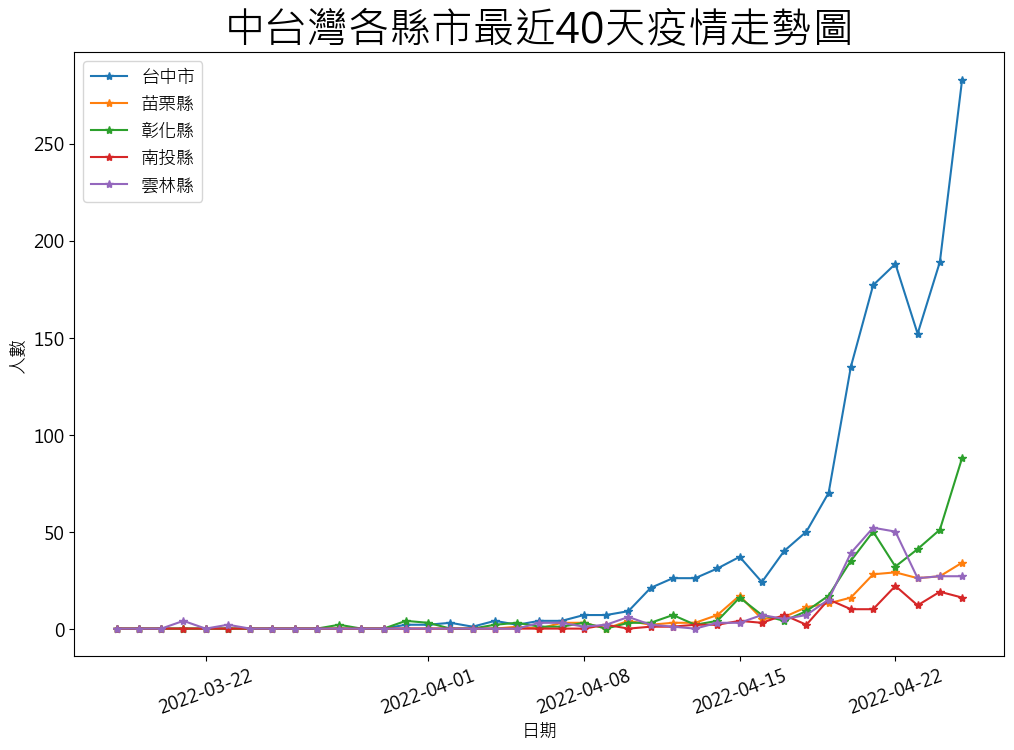

0 : 2022-03-18
0
0
1
0
0
0
1 : 2022-03-19
0
0
1
3
0
0
2 : 2022-03-20
0
2
2
1
0
0
3 : 2022-03-21
0
1
0
1
0
0
4 : 2022-03-22
0
0
0
1
0
0
5 : 2022-03-23
1
0
0
0
0
0
6 : 2022-03-24
11
1
0
0
0
0
7 : 2022-03-25
4
0
0
0
0
0
8 : 2022-03-26
1
0
0
0
0
0
9 : 2022-03-27
3
0
0
0
0
0
10 : 2022-03-28
2
0
0
0
0
0
11 : 2022-03-29
3
0
0
0
0
0
12 : 2022-03-30
2
0
0
0
0
0
13 : 2022-03-31
4
0
0
0
0
0
14 : 2022-04-01
6
0
0
0
0
0
15 : 2022-04-02
6
0
0
0
4
0
16 : 2022-04-03
1
0
0
0
1
0
17 : 2022-04-04
5
0
0
0
0
0
18 : 2022-04-05
34
4
0
2
1
0
19 : 2022-04-06
36
5
0
7
4
0
20 : 2022-04-07
50
7
0
1
6
0
21 : 2022-04-08
30
6
2
8
9
0
22 : 2022-04-09
25
17
6
3
22
0
23 : 2022-04-10
30
4
1
6
18
0
24 : 2022-04-11
49
9
0
4
12
0
25 : 2022-04-12
63
11
3
3
19
0
26 : 2022-04-13
45
18
2
1
4
0
27 : 2022-04-14
50
20
2
3
19
0
28 : 2022-04-15
59
32
1
1
14
0
29 : 2022-04-16
41
11
2
1
15
0
30 : 2022-04-17
26
17
0
10
18
1
31 : 2022-04-18
50
41
2
3
16
1
32 : 2022-04-19
106
33
3
0
25
1
33 : 2022-04-20
69
33
6
4
36
0
34 : 2022-04-21
12

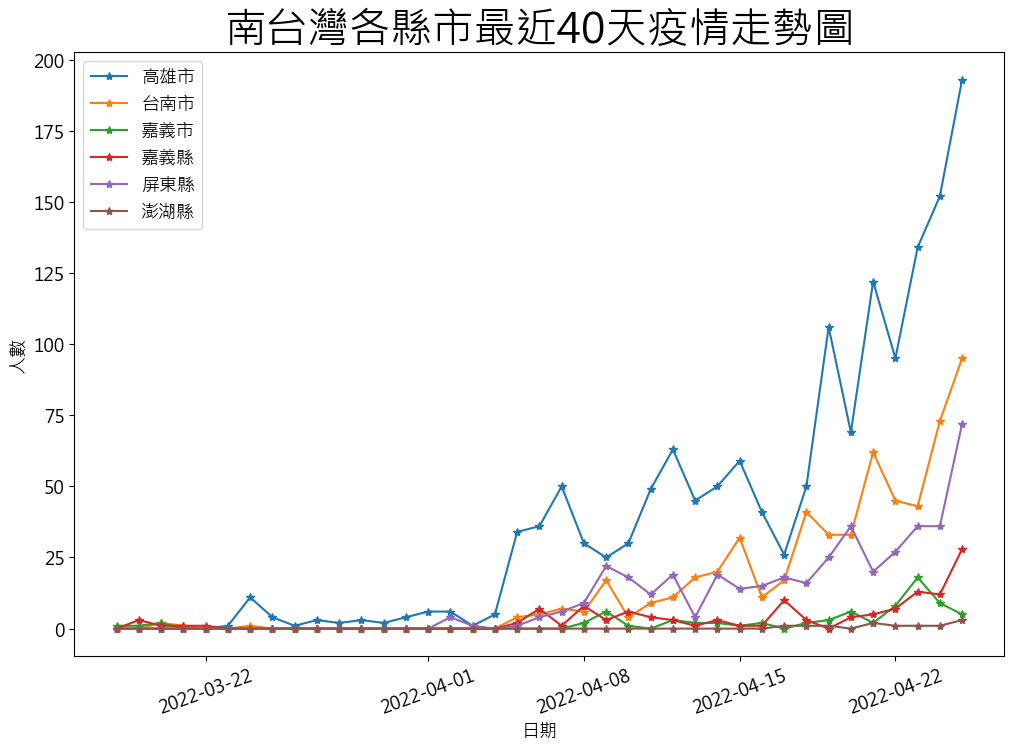

0 : 2022-03-18
0
0
1 : 2022-03-19
0
0
2 : 2022-03-20
0
0
3 : 2022-03-21
0
0
4 : 2022-03-22
0
0
5 : 2022-03-23
0
0
6 : 2022-03-24
0
0
7 : 2022-03-25
0
0
8 : 2022-03-26
0
0
9 : 2022-03-27
0
6
10 : 2022-03-28
0
3
11 : 2022-03-29
0
1
12 : 2022-03-30
0
7
13 : 2022-03-31
4
0
14 : 2022-04-01
4
1
15 : 2022-04-02
2
0
16 : 2022-04-03
2
0
17 : 2022-04-04
11
0
18 : 2022-04-05
5
1
19 : 2022-04-06
19
0
20 : 2022-04-07
25
1
21 : 2022-04-08
20
0
22 : 2022-04-09
13
0
23 : 2022-04-10
24
2
24 : 2022-04-11
28
1
25 : 2022-04-12
44
2
26 : 2022-04-13
54
3
27 : 2022-04-14
142
21
28 : 2022-04-15
56
11
29 : 2022-04-16
120
18
30 : 2022-04-17
57
16
31 : 2022-04-18
73
6
32 : 2022-04-19
88
5
33 : 2022-04-20
92
22
34 : 2022-04-21
102
38
35 : 2022-04-22
130
26
36 : 2022-04-23
171
34
37 : 2022-04-24
162
25
38 : 2022-04-25
212
40
['花蓮縣', '台東縣']
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 6], [0, 3], [0, 1], [0, 7], [4, 0], [4, 1], [2, 0], [2, 0], [11, 0], [5, 1], [19, 0], [25, 1], [20, 

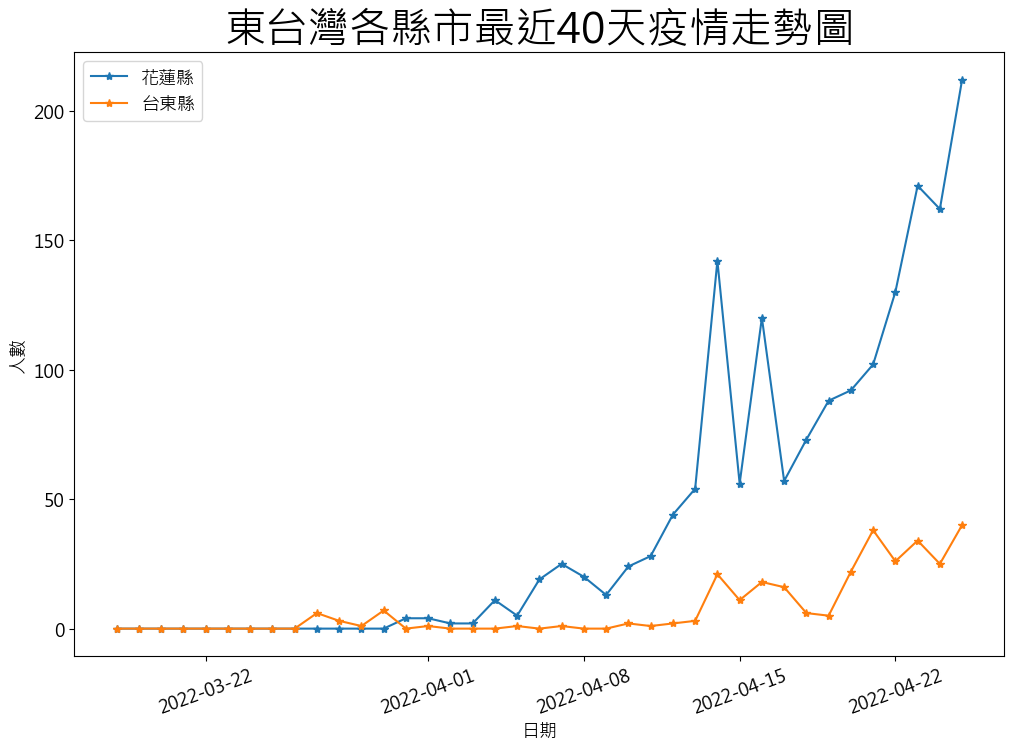

0 : 2022-03-18
0
0
1 : 2022-03-19
0
0
2 : 2022-03-20
0
0
3 : 2022-03-21
0
0
4 : 2022-03-22
0
0
5 : 2022-03-23
0
0
6 : 2022-03-24
0
0
7 : 2022-03-25
0
0
8 : 2022-03-26
0
0
9 : 2022-03-27
0
0
10 : 2022-03-28
0
0
11 : 2022-03-29
0
0
12 : 2022-03-30
0
0
13 : 2022-03-31
1
0
14 : 2022-04-01
1
0
15 : 2022-04-02
0
0
16 : 2022-04-03
1
0
17 : 2022-04-04
0
0
18 : 2022-04-05
0
0
19 : 2022-04-06
1
0
20 : 2022-04-07
0
0
21 : 2022-04-08
0
0
22 : 2022-04-09
0
0
23 : 2022-04-10
0
0
24 : 2022-04-11
0
0
25 : 2022-04-12
0
0
26 : 2022-04-13
1
0
27 : 2022-04-14
0
0
28 : 2022-04-15
0
0
29 : 2022-04-16
0
0
30 : 2022-04-17
0
0
31 : 2022-04-18
0
3
32 : 2022-04-19
0
3
33 : 2022-04-20
0
2
34 : 2022-04-21
5
1
35 : 2022-04-22
2
1
36 : 2022-04-23
5
2
37 : 2022-04-24
1
2
38 : 2022-04-25
9
1
['金門縣', '連江縣']
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 0], [1, 0], [0, 0], [1, 0], [0, 0], [0, 0], [1, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 0]

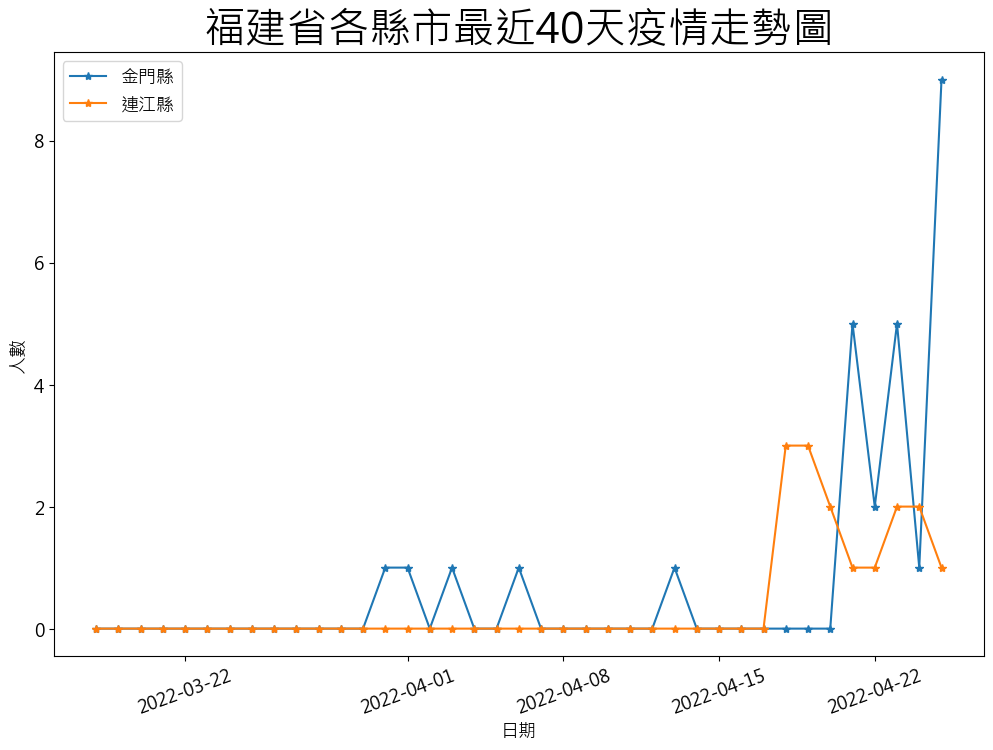

0 : 2022-03-18
1
0
0
0
0
0
1 : 2022-03-19
0
0
3
0
0
0
2 : 2022-03-20
1
3
0
0
2
0
3 : 2022-03-21
1
0
0
0
1
0
4 : 2022-03-22
3
0
0
0
0
0
5 : 2022-03-23
1
1
0
0
0
1
6 : 2022-03-24
0
1
0
0
1
11
7 : 2022-03-25
0
11
0
0
0
4
8 : 2022-03-26
0
14
1
0
0
1
9 : 2022-03-27
1
8
2
0
0
3
10 : 2022-03-28
5
10
4
0
0
2
11 : 2022-03-29
1
10
5
0
0
3
12 : 2022-03-30
7
16
14
0
0
2
13 : 2022-03-31
10
35
23
2
0
4
14 : 2022-04-01
19
51
22
2
0
6
15 : 2022-04-02
13
82
25
3
0
6
16 : 2022-04-03
22
43
16
1
0
1
17 : 2022-04-04
29
91
13
4
0
5
18 : 2022-04-05
41
95
10
2
4
34
19 : 2022-04-06
84
114
35
4
5
36
20 : 2022-04-07
61
156
30
4
7
50
21 : 2022-04-08
74
138
40
7
6
30
22 : 2022-04-09
67
125
42
7
17
25
23 : 2022-04-10
96
173
35
9
4
30
24 : 2022-04-11
101
154
30
21
9
49
25 : 2022-04-12
142
254
74
26
11
63
26 : 2022-04-13
147
359
94
26
18
45
27 : 2022-04-14
145
345
153
31
20
50
28 : 2022-04-15
185
409
264
37
32
59
29 : 2022-04-16
223
420
193
24
11
41
30 : 2022-04-17
246
519
187
40
17
26
31 : 2022-04-18
285
561
198
50


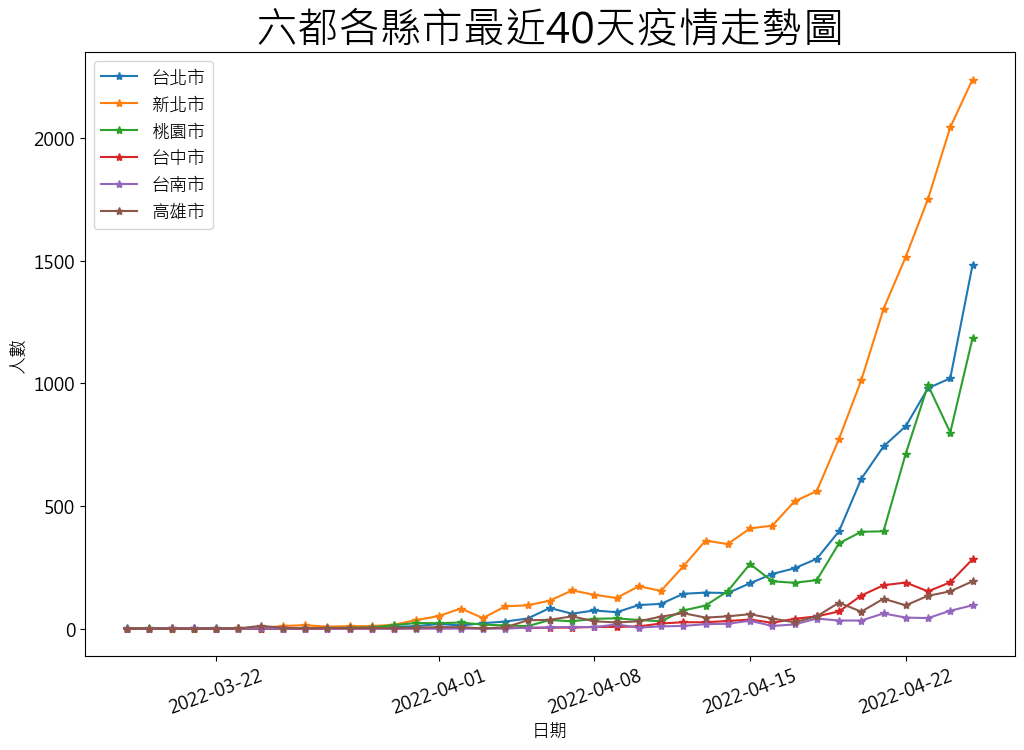

In [5]:
import matplotlib.pyplot as plt

# 只想畫指定的就這樣寫 一次一個
#which_='北台灣'

def Create_plt_df_fn(which_):
    nums_list=[list() for n in range(len(ago_list))]
    for i,ago in enumerate(ago_list):
        city_nums=df.loc[df['個案公佈日']==ago]   # 先搜尋需要的日期縮小範圍
        print(i,':',ago)
        for keys,values in citys_dict_new.items():
            if keys==which_:
                df_columns=values
                df_columns=list(df_columns)
                for v in values:
                    nums=city_nums.loc[city_nums['縣市']==v]    # 再搜尋符合which_字典鍵的值
                    print(len(nums))                            # 並len計算確診數 
                    nums_list[i].append(len(nums))              # 每個日期各縣市確診數為一個list
    print(df_columns)
    print(nums_list)

    # 建立成畫圖用的df
    trends_nums_df=pd.DataFrame(nums_list,columns=df_columns,index=ago_list)
    print(trends_nums_df)

    # 從字串轉成日期格式 以免太多擠在一起
    to_date_index=trends_nums_df.index
    to_date_index=pd.to_datetime(to_date_index)
    Plt_which_fn(which_,to_date_index,trends_nums_df)
    
def Plt_which_fn(which_,to_date_index,trends_nums_df):
    # 顯示中文
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
    plt.rcParams['axes.unicode_minus'] = False

    fig=plt.figure(dpi=100,figsize=(12,8))
    for oo in citys_dict_new[which_]:
        plt.plot(to_date_index,trends_nums_df[oo],'-*',label=oo)
    plt.title(which_+'各縣市最近'+str(how_days)+'天疫情走勢圖',fontsize=30)
    plt.xlabel('日期',fontsize=13)
    plt.ylabel('人數',fontsize=13)
    plt.xticks(fontsize=13,rotation=20)
    plt.yticks(fontsize=13)
    plt.legend(loc='best',fontsize=13)
    plt.show()
    
# 用for跑which_可依序一次畫好圖
for K,V in citys_dict_new.items():
    Create_plt_df_fn(K)